In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [11]:
#Columns/Features
D = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
L = ['Sex']
C = 'Rings'
DL = D + L
DLC = D + [L] + [C]
DC = D + [C]


# #Loading Data set
abalone = pd.read_csv("abalone.csv", sep=',')


Data: shape=(4177, 7)


'describe'

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


'skew:'

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

'kurtosis'

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
dtype: float64

'variance'

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
dtype: float64

'range:'

Length            0.7400
Diameter          0.5950
Height            1.1300
Whole weight      2.8235
Shucked weight    1.4870
Viscera weight    0.7595
Shell weight      1.0035
dtype: float64

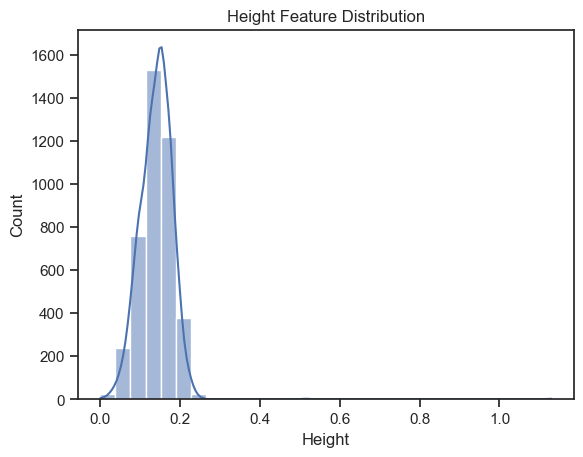

Data: shape after removing outliers=(4148, 7)


'kurtosis'

Length           -0.103999
Diameter         -0.189124
Height           -0.369865
Whole weight     -0.056522
Shucked weight    0.545112
Viscera weight   -0.052222
Shell weight      0.526980
dtype: float64

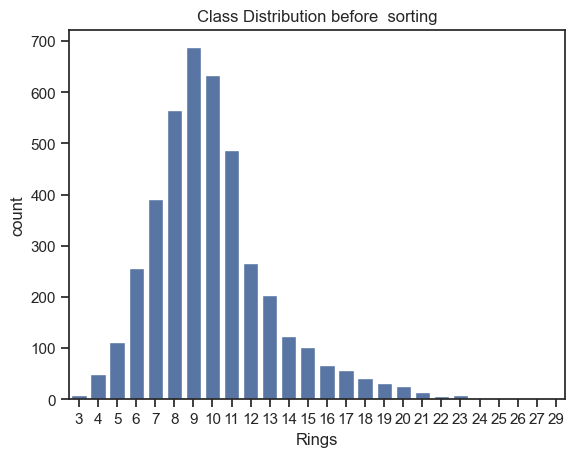

,Original_Rings,Binned_Category
520,3,1
44,4,1
42,5,1
48,6,1
1,7,1
5,8,1
2,9,2
3,10,3
12,11,4
15,12,4


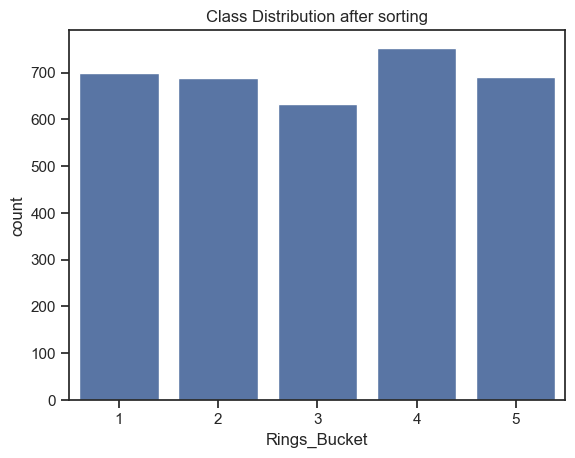

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings_Bucket,Sex_F,Sex_I,Sex_M
3587,0.635,0.495,0.170,1.3695,0.6570,0.3055,0.3650,3,0.0,0.0,1.0
2722,0.375,0.275,0.095,0.2295,0.0950,0.0545,0.0660,1,0.0,1.0,0.0
3757,0.520,0.410,0.140,0.6990,0.3395,0.1290,0.1945,3,0.0,1.0,0.0
1349,0.590,0.455,0.155,0.8855,0.3880,0.1880,0.2750,3,0.0,0.0,1.0
752,0.605,0.460,0.170,1.1220,0.3470,0.3045,0.3150,5,1.0,0.0,0.0
1956,0.645,0.490,0.175,1.3200,0.6525,0.2375,0.3385,4,0.0,0.0,1.0
795,0.515,0.405,0.145,0.6950,0.2150,0.1635,0.2340,5,0.0,0.0,1.0
4013,0.625,0.505,0.175,1.1310,0.5425,0.2265,0.3230,1,0.0,0.0,1.0
364,0.620,0.500,0.175,1.1860,0.4985,0.3015,0.3500,4,1.0,0.0,0.0
975,0.530,0.425,0.150,0.8495,0.3280,0.2320,0.2020,1,1.0,0.0,0.0


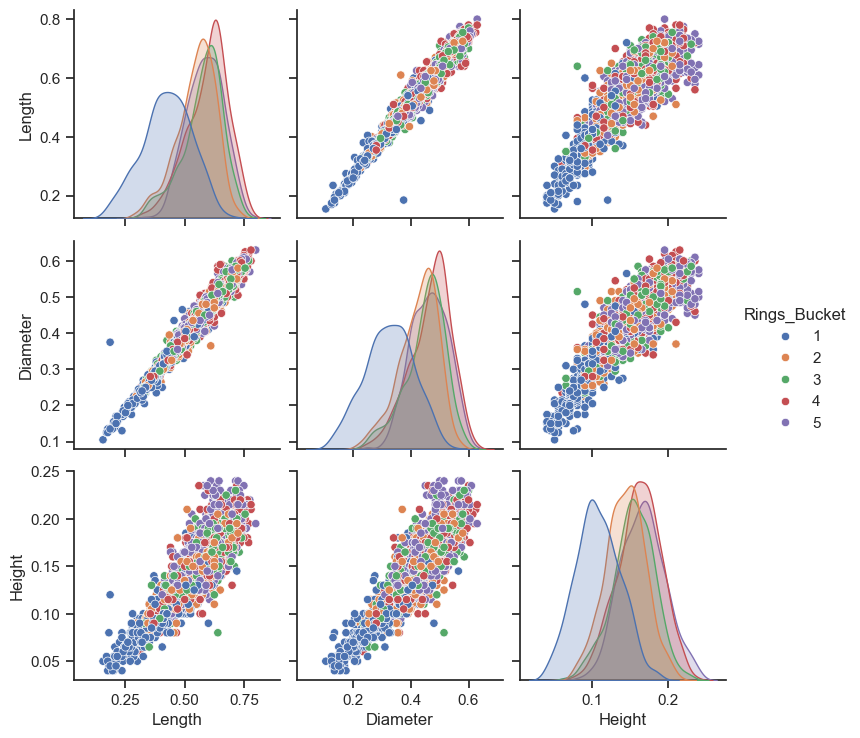

'after normalizing'

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,3.465000e+03,3.465000e+03,3.465000e+03,3.465000e+03,3.465000e+03,3.465000e+03,3.465000e+03
mean,4.101257e-17,-2.553032e-16,-4.142269e-16,1.619996e-16,-3.455309e-16,-7.330996e-17,-2.158286e-16
std,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00
min,-3.608622e+00,-3.586625e+00,-3.009000e+00,-1.866505e+00,-1.769488e+00,-1.850185e+00,-1.902170e+00
25%,-6.054373e-01,-5.694850e-01,-5.994028e-01,-7.646567e-01,-7.739491e-01,-7.552731e-01,-7.384903e-01
50%,1.800111e-01,1.568636e-01,1.093021e-01,-5.662467e-02,-8.050503e-02,-7.212311e-02,-2.181137e-02
75%,7.344452e-01,7.155933e-01,6.762661e-01,6.503600e-01,6.358250e-01,6.484598e-01,6.099005e-01
max,2.351545e+00,2.280036e+00,2.660640e+00,4.015607e+00,5.018483e+00,4.148434e+00,5.486273e+00


In [12]:
print(f'Data: shape={abalone[D].shape}')
display("describe",abalone[D].describe())
display("skew:",abalone[D].skew())
display("kurtosis", abalone[D].kurtosis())
display("variance", abalone[D].std())

feature_range = abalone[D].max() - abalone[D].min()
display("range:")
display(feature_range)


sns.histplot(abalone['Height'], bins=30, kde=True)  
plt.title("Height Feature Distribution")
plt.show()

Q1 = abalone['Height'].quantile(0.25)
Q3 = abalone['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
abalone = abalone[(abalone['Height'] >= lower_bound) & (abalone['Height'] <= upper_bound)]
print(f'Data: shape after removing outliers={abalone[D].shape}')
display("kurtosis", abalone[D].kurtosis())



# sns.countplot(x =abalone[C])
# plt.title("Class Distribution")
# plt.show()

sns.countplot(x = abalone[C])
plt.title("Class Distribution before  sorting")
plt.show()


X = abalone[DL]
y = abalone[C]
#splitting the target variable into buckets to make it a balanced classification problem
value_counts = y.value_counts().sort_index()
cumulative_counts = value_counts.cumsum()
total_samples = cumulative_counts.max()
num_buckets = 5

percentiles = np.linspace(0, 1, num_buckets + 1)  # Create bin edges
bin_edges = np.percentile(y, percentiles * 100) #find boundaries
bin_labels = range(1, num_buckets + 1)

y_bucket = pd.cut(y, bins=bin_edges, labels=range(1, num_buckets + 1), include_lowest=True)

ring_to_category = pd.DataFrame({'Original_Rings': y, 'Binned_Category': y_bucket})
ring_to_category = ring_to_category.drop_duplicates().sort_values(by='Original_Rings')
display(ring_to_category)

class_1_subset = X[y_bucket == 1]
class_1_subset_y = y_bucket[y_bucket == 1] 
class_1_indices = y_bucket[y_bucket == 1].index  # Get indices of class 1
other_class_indices = y_bucket[y_bucket != 1].index  # Get indices of other classes
class_1_sampled_indices = np.random.choice(class_1_indices, size=700, replace=False)  # Choose 500 random samples
final_indices = np.concatenate([class_1_sampled_indices, other_class_indices])


# Step 3: Use these indices to select from X and y
X = X.loc[final_indices] 
y = y_bucket.loc[final_indices] 

abalone = pd.concat([X, y], axis=1)
abalone = shuffle(abalone, random_state=42)
abalone = abalone.rename(columns={'Rings': 'Rings_Bucket'})

sns.countplot(x=abalone['Rings_Bucket'])
plt.title("Class Distribution after sorting")
plt.show()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(abalone[L])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(L), index=abalone.index)
# Drop categorical columns and replace with encoded ones
abalone = abalone.drop(columns=L).join(encoded_df)

display(abalone.head(20))

subset = ['Length', 'Diameter', 'Height', 'Rings_Bucket']
sns.pairplot(abalone[subset], hue='Rings_Bucket')
plt.show()


scaler = StandardScaler()
#standardize everything except target variable and one-hot-encoding
numeric_features = abalone.columns[0:-4]
abalone[numeric_features] = scaler.fit_transform(abalone[numeric_features])

display("after normalizing",abalone[D].describe())

X = abalone[D + list(encoded_df.columns)]
y = abalone['Rings_Bucket']


In [19]:
#KNN classification
k_performance = {}

'''
for k in range(1, 50):
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    accuracies = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        
    k_performance[k] = np.mean(accuracies)

plt.plot(k_performance.keys(), k_performance.values(), marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy') 
plt.title('KNN Accuracy Performance vs K')
plt.show()
'''

#training using the best k value of 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model with k=4
best_k = 26
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={best_k} on 80/20 split: {accuracy:.4f}')


#training using the best k value for the Weighted KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






Accuracy with k=26 on 80/20 split: 0.4473


In [ ]:
#Decision Tree Classifier

In [ ]:
#Random Forest Classifier

In [ ]:
#Summarize Results